# Warming Levels Processor Documentation

The Warming Levels processor in ClimakitAE transforms time-series climate data into a warming-levels approach, allowing you to analyze climate data based on global warming levels rather than specific time periods.

## Key Features

- **Warming Level Transformation**: Convert time-series data to warming level dimensions
- **Flexible Window Selection**: Configurable time windows around central warming level years
- **Multiple Warming Levels**: Support for multiple warming levels (e.g., 1.5°C, 2.0°C, 3.0°C)
- **Time Delta Dimensions**: Access to data before, during, and after warming level periods

## Data Requirements

- **Historical Data**: Must include historical climate data for proper warming level calculations
- **Simulation Dimension**: Data should have simulation/ensemble member dimensions

## Basic Usage

The warming levels processor is used within the `.processes()` method of the ClimateData interface. Here's the basic syntax:

```python
data = (cd
    .catalog("cadcat")
    .variable("temperature_variable")
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0],  # Required: warming levels in °C
            "warming_level_window": 15           # Optional: years around center (default: 15)
        }
    })
    .get()
)
```

## Configuration Parameters

- **`warming_levels`** (list of float, required): Global warming levels in degrees Celsius above pre-industrial levels
  - Example: `[1.5, 2.0, 3.0]` for 1.5°C, 2.0°C, and 3.0°C warming levels
  - Must be positive values typically between 1.0 and 4.0

- **`warming_level_window`** (int, optional): Number of years before and after the central warming level year
  - Default: 15 years
  - Example: With window=15, you get 31 total years (15 before + center year + 15 after)
  - Range: typically 5-30 years

## Output Data Structure

The processor transforms your data to include these dimensions:

- **`warming_level`**: The specified warming levels (e.g., 1.5, 2.0, 3.0°C)
- **`time_delta`**: Years relative to the central warming level year (-15 to +15 for default window)
- **`sim`**: Simulation/ensemble members
- **Spatial dimensions**: Preserved from original data (lat, lon, x, y, etc.)

## Example Walkthrough

In this notebook, we'll demonstrate how to:

1. **Set up ClimateData**: Initialize the climate data interface
2. **Configure Data Selection**: Select specific climate variables and data catalogs
3. **Apply Warming Levels Processing**: Transform time-series data to warming levels
4. **Explore the Results**: Understand the output data structure and dimensions
5. **Visualize the Data**: Create plots of warming level data

The example will use:
- **Variable**: `t2max` (maximum 2-meter temperature)
- **Warming Level**: 2.0°C above pre-industrial levels
- **Data Source**: WRF climate model data
- **Default Window**: 15 years before and after the central warming year

## Step-by-Step Implementation

Let's walk through a complete example of using the warming levels processor:

### Step 1: Import and Initialize

First, we'll import the ClimateData interface and create an instance:

In [ ]:
from climakitae.new_core.user_interface import ClimateData


In [ ]:
cd = ClimateData()

✅ Ready to query! 


### Step 2: Configure Data Selection and Apply Warming Levels Processing

Now we'll configure our data selection and apply the warming levels processor. Notice the key components:

- **Data Selection**: We specify the catalog, activity ID, table ID, grid label, and variable
- **Warming Levels Processing**: We use the `processes()` method with the `"warming_level"` key
- **Configuration**: We specify `warming_levels: [2.0]` for 2°C warming level analysis

Note: The JavaScript language tag is used for syntax highlighting purposes, but this is Python code:

In [ ]:
gwl_data = (cd
    .catalog("cadcat")
    .activity_id("WRF")
    .table_id("mon")
    .grid_label("d01")
    .variable("t2max")
    .processes({
        "warming_level": {
            "warming_levels": [2.0]
        }
    })
    .get()
)

/home/nschroed/Work/climakitae/climakitae/new_core/data_access/data_access.py:229: UserWarning: 

Catalog key 'data' not found.
Attempting to find intended catalog key.


  warnings.warn(
/home/nschroed/Work/climakitae/climakitae/new_core/data_access/data_access.py:249: UserWarning: 

Using closest match 'cadcat' for validator 'data'.
  warnings.warn(
/home/nschroed/Work/climakitae/climakitae/new_core/dataset_factory.py:423: UserWarning: 

Using closest match 'cadcat' for validator 'data'.
  warnings.warn(
/home/nschroed/Work/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.read_csv(
/home/nschroed/Work/climakitae/climakitae/util/utils.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

Available catalog keys: ['cadcat', 'boundary', 'renewable energy generation', 'stations']
Found 19 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'WRF', 'table_id': 'mon', 'grid_label': 'd01', 'variable_id': 't2max'}


/home/nschroed/Work/climakitae/climakitae/new_core/processors/filter_unadjusted_models.py:96: UserWarning: 

Your query selected models that do not have a-priori bias adjustment. 
These models have been removed from the returned query.
To include them, please add the following processor to your query: 
ClimateData().processes('filter_unadjusted_models': 'no')


  warnings.warn(




INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


/home/nschroed/Work/climakitae/climakitae/new_core/processors/processor_utils.py:802: UserWarning: 

No historical data found for WRF.UCLA.EC-Earth3.ssp370.mon.d01.r1i1p1f1 with key WRF.UCLA.EC-Earth3.historical.mon.d01.r1i1p1f1. 
Historical data is required for time domain extension. 
Keeping original SSP data without historical extension.
  warnings.warn(
/home/nschroed/Work/climakitae/climakitae/new_core/processors/processor_utils.py:802: UserWarning: 

No historical data found for WRF.UCLA.TaiESM1.ssp370.mon.d01.r1i1p1f1 with key WRF.UCLA.TaiESM1.historical.mon.d01.r1i1p1f1. 
Historical data is required for time domain extension. 
Keeping original SSP data without historical extension.
  warnings.warn(
/home/nschroed/Work/climakitae/climakitae/new_core/processors/processor_utils.py:802: UserWarning: 

No historical data found for WRF.UCLA.EC-Earth3-Veg.ssp370.mon.d01.r1i1p1f1 with key WRF.UCLA.EC-Earth3-Veg.historical.mon.d01.r1i1p1f1. 
Historical data is required for time domain e

In [ ]:
gwl_data

<xarray.Dataset> Size: 85MB
Dimensions:            (sim: 5, warming_level: 1, time_delta: 372, y: 104,
                        x: 109)
Coordinates:
  * sim                (sim) object 40B 'WRF_UCLA_EC-Earth3_ssp370_mon_d01_r1...
  * warming_level      (warming_level) float64 8B 2.0
    Lambert_Conformal  int32 4B 1
    lakemask           (y, x) float32 45kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    landmask           (y, x) float32 45kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    lat                (y, x) float32 45kB 9.476 9.693 9.909 ... 67.18 67.33
    lon                (y, x) float32 45kB -123.5 -123.2 ... -103.3 -102.4
  * x                  (x) float64 872B -6.285e+06 -6.24e+06 ... -1.425e+06
  * y                  (y) float64 832B -1.126e+06 -1.081e+06 ... 3.509e+06
  * time_delta         (time_delta) int64 3kB -186 -185 -184 ... 183 184 185
    simulation         (sim) <U46 920B 'WRF.UCLA.EC-Earth3.ssp370.mon.d01.r1i...
    centered_year      (sim, warming_level) int64 40B 2034 2040 2025 2053 2045
Data variables:
    t2max              (sim, warming_level, time_delta, y, x) float32 84MB dask.array<chunksize=(1, 1, 56, 104, 109), meta=np.ndarray>
Attributes: (12/118)
    AERCU_FCT:                        1.0
    AERCU_OPT:                        0
    AUTO_LEVELS_OPT:                  2
    BL_PBL_PHYSICS:                   1
    BOTTOM-TOP_GRID_DIMENSION:        40
    BOTTOM-TOP_PATCH_END_STAG:        40
    ...                               ...
    resolution:                       45 km
    warming_level:                    {'warming_levels': [2.0]}
    filter_unadjusted_models:         yes
    concat:                           Process 'concat' applied to the data. T...
    update_attributes:                Process 'update_attributes' applied to ...
    warming_level_simple:             Process 'warming_level_simple' applied ...

### Step 3: Understanding the Output

The warming levels processor transforms the original time-series data into a new structure. Let's examine what we get:

- **New dimensions**: The data now has `warming_level`, `time_delta`, and `sim` dimensions
- **Time transformation**: Instead of calendar years, we have `time_delta` representing years relative to the warming level
- **Warming level focus**: Data is organized around the 2.0°C warming threshold we specified

Let's look at the data structure by displaying the dataset:

### Step 4: Visualizing and Analyzing Warming Level Data

Now we'll create visualizations to explore the warming level data. The plotting code demonstrates:

- **Multi-variable plotting**: Iterate through all variables in the dataset
- **Dimension selection**: Use `.isel()` to select specific warming levels, time deltas, and simulations
- **Spatial visualization**: Create plots showing the spatial distribution of climate data

The example selects:
- `sim=0`: First simulation/ensemble member
- `warming_level=0`: First warming level (2.0°C in our case)
- `time_delta=0`: Central year when the warming level is reached

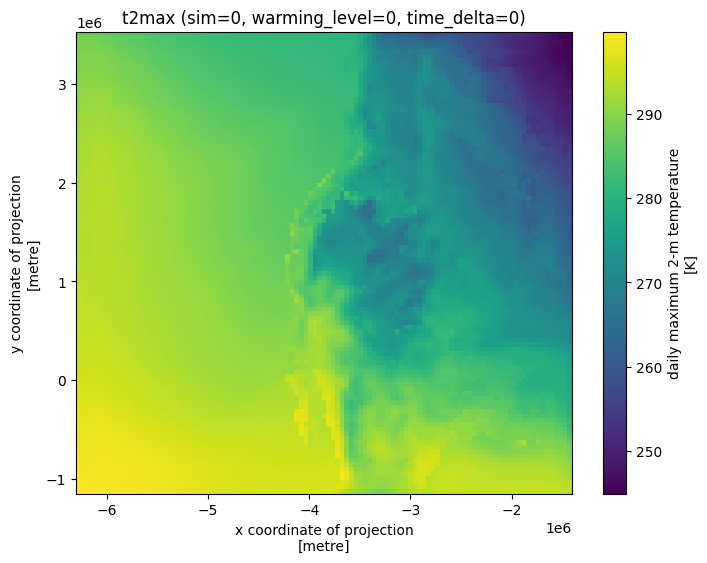

In [ ]:
import matplotlib.pyplot as plt

# Plot each variable in gwl_data
for var in gwl_data.data_vars:
    data = gwl_data[var]
    # Select the first simulation, warming_level, and time_delta for plotting
    arr = data.isel(sim=0, warming_level=0, time_delta=0)
    plt.figure(figsize=(8, 6))
    arr.plot()
    plt.title(f"{var} (sim=0, warming_level=0, time_delta=0)")
    plt.show()

## Advanced Usage and Best Practices

### Multiple Warming Levels

You can analyze multiple warming levels simultaneously by specifying a list:

```python
gwl_data = (cd
    .catalog("data")
    .variable("t2max")
    .processes({
        "warming_level": {
            "warming_levels": [1.5, 2.0, 3.0],  # Multiple warming levels
            "warming_level_window": 20           # Larger window for more data
        }
    })
    .get()
)
```

### Time Delta Analysis

The `time_delta` dimension allows you to analyze climate changes over time relative to the warming level:

```python
# Analyze temperature evolution around 2°C warming
temp_evolution = gwl_data.sel(warming_level=2.0)
mean_temp_by_time_delta = temp_evolution.mean(dim=['sim', 'x', 'y'])

# Plot temperature change over time relative to warming level
plt.figure(figsize=(10, 6))
mean_temp_by_time_delta.plot()
plt.xlabel('Years relative to 2°C warming level')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution Around 2°C Warming Level')
plt.show()
```

### Simulation Ensemble Analysis

Compare different simulations to understand uncertainty:

```python
# Calculate ensemble statistics
ensemble_mean = gwl_data.mean(dim='sim')
ensemble_std = gwl_data.std(dim='sim')

# Plot ensemble spread
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ensemble_mean.isel(warming_level=0, time_delta=0).plot(ax=ax1)
ax1.set_title('Ensemble Mean')
ensemble_std.isel(warming_level=0, time_delta=0).plot(ax=ax2)
ax2.set_title('Ensemble Standard Deviation')
plt.show()
```